# project prediksi umur abalone menggunakan kondisi pengukuran fisik

### keterangan dataset
- Sex 			: Male, Female, and I (infant)
- Length 		    : Panjang cangkang dalam milimeter
- Diameter 		: Diameter dalam milimeter
- Height 			: Tinggi termasuk daging dalam cangkang dalam milimeter
- Whole weight 	: Berat keseluruhan abalone dalam gram
- Shucked weight	: Berat daging abalone gram
- Viscera weight 	: Berat usus abalone setelah dikeringkan gram
- Shell weight 	: Berat cangkang setelah dikeringkan gram
- Rings 			: Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon 


In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
df.shape

(4177, 9)

In [20]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [21]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


berdasarkan summary statistic pada data kolom height(Tinggi termasuk daging dalam cangkang dalam milimeter)  memiliki minimum 0 sehingga sangat tidak memungkinkan tinggi abalon= 0, maka dari itu kita perlu menghapus height=0 karena kemungkinan height tidak dihitung dalam sample tersebut

In [22]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [23]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

disini saya menghapus 2 row pada dataset sehingga jumlah dataset berkurang

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


mengubah kolom sex menjadi kategorik

In [25]:
df['Age'] = df['Rings']+1.5 #Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


membuat kolom baru berisikan umur dari abalon pada kolom age 

C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


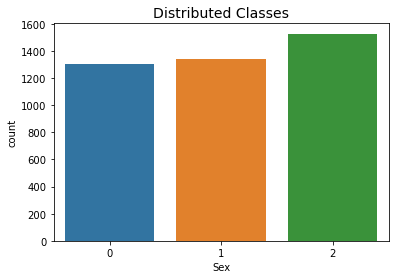

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('Sex', data=df)
plt.title('Distributed Classes', fontsize=14)
plt.show()

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

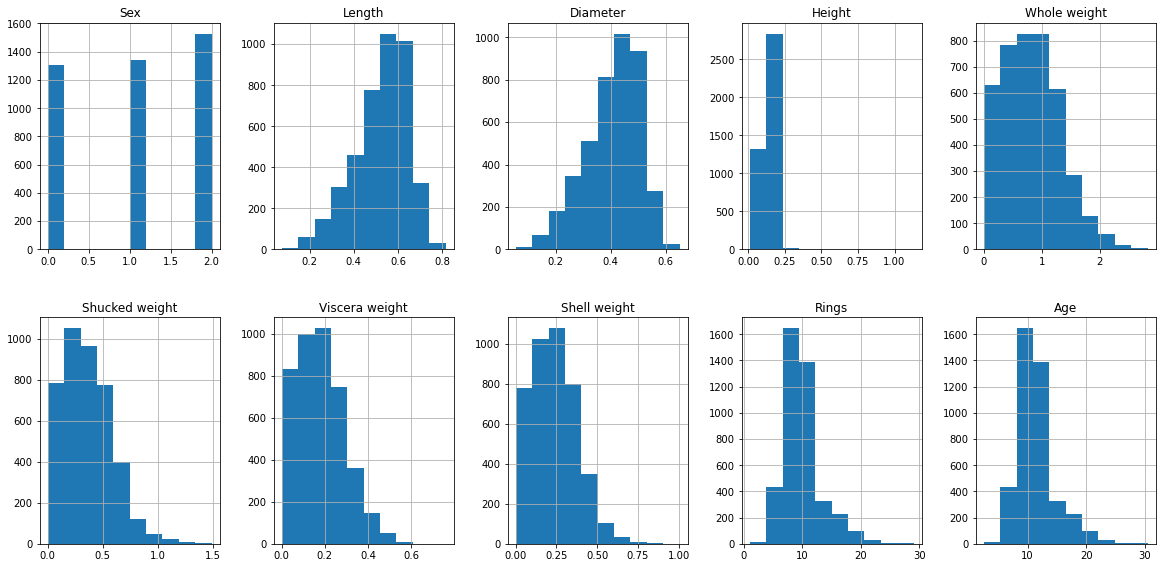

In [32]:
df.hist(figsize = (20,15), layout = (3,5))

berdasarkan histogram distribusi data cukup menyebar namum condong terlalu tinggi sehingga perlu dilakukan normalisasi

In [33]:
df.skew().sort_values(ascending = False)

Height            3.166364
Rings             1.113754
Age               1.113754
Shucked weight    0.718735
Shell weight      0.621081
Viscera weight    0.591455
Whole weight      0.530549
Sex              -0.098224
Diameter         -0.610182
Length           -0.640993
dtype: float64

rata rata kecondongan mendekati 0 untuk kurva distribusi normal, untuk kecondongan height tertinggi 3,166 , kemungkinan adanya outlier tinggi maka kita perlu memriksanya sebelum membentuk model

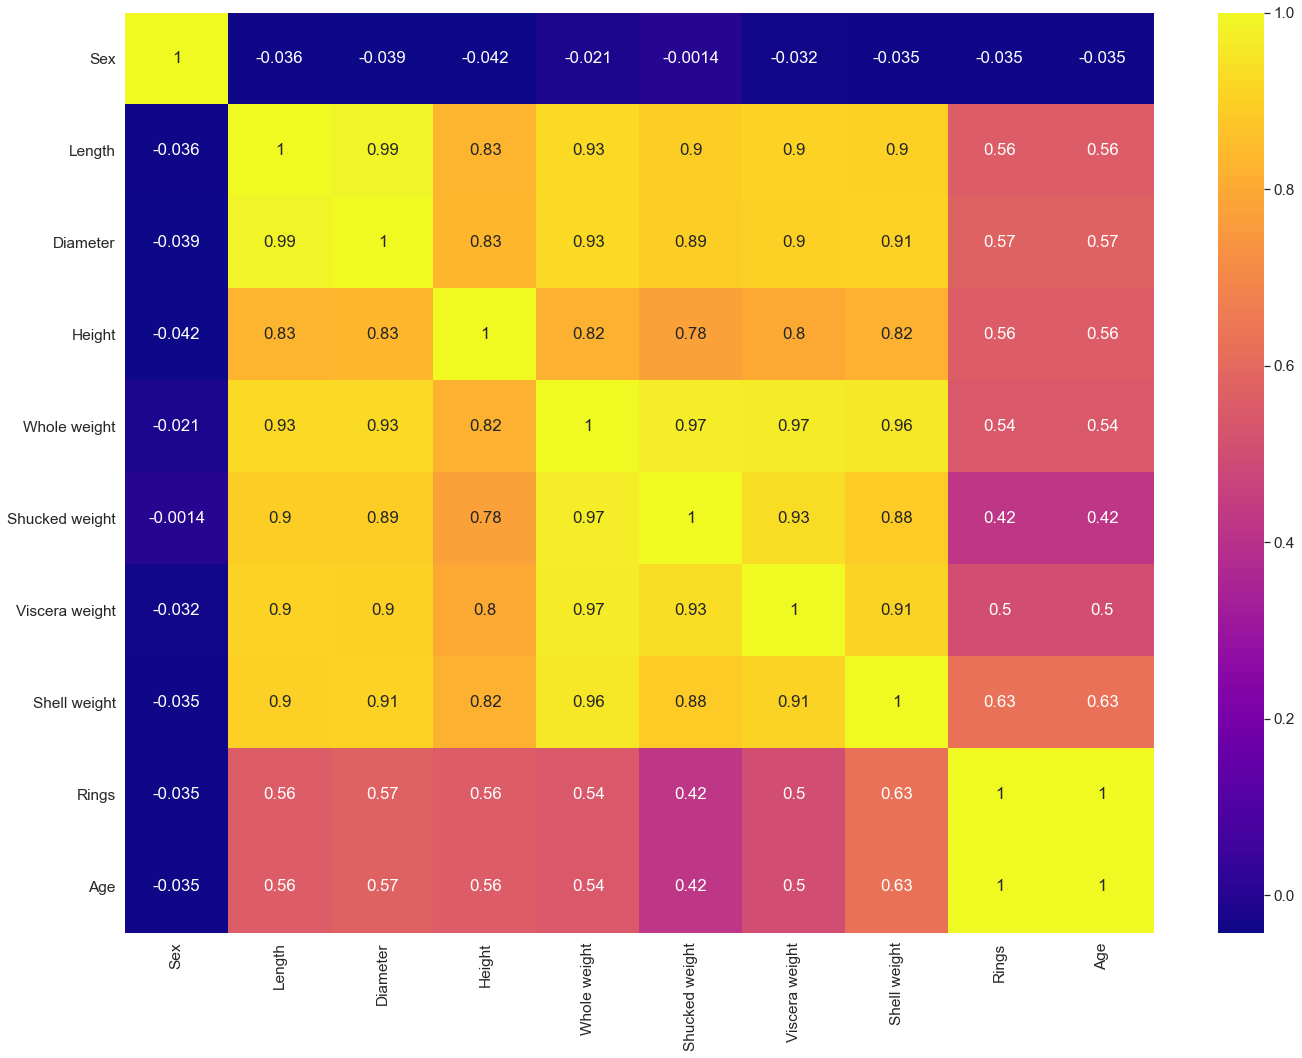

In [35]:
korelasi = df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
sns.heatmap(korelasi, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

Adanya korelasi yang tinggi antara Length dan Diameter, Korelasi tinggi antara shucked weight dan viscera weight sebesar 0.93 ,shucked weight dan Whole weight sebesar  0.97,viscera weight dan  Whole weight sebesar  0.97,  Shell weight dan  Whole weight sebesar 096